### Data preparation
The terrain data was clipped to the extent of the catchment boundary using QGIS, as follows:
- Raster -> Extraction -> Clipper
- Input file -> TerrainData/terrain.tif
- Output file -> TerrainData/terrain_clipped_QGIS.tif
- NoData value -> -9999

In [2]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import earthpy.spatial as es
from rasterio.plot import plotting_extent
import earthpy.plot as ep
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patches as mpatches
from rasterio.plot import show
from rasterio import plot

In [3]:
def plot_spatial_new(ax, fp, catchment_gdf, cbar=True, colors=None, labels=None,legend=True):
    
    if colors!=None:
        # Create the colourmap
        cmap = mpl.colors.ListedColormap(colors)
        # And set up the legend object
        if legend == True:
            patches_list = []
            for i, color in  enumerate(colors):
                patch =  mpatches.Patch(color=color, label=labels[i])
                patches_list.append(patch)  
            ax.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =5);

    # For terrain plot
    else:
        cmap = 'terrain'  

    with rasterio.open(fp) as src:
        # array = src.read(1)
        
        image = plot.show(src, ax=ax,  cmap=cmap, vmin=20, vmax = 250)
        im = image.get_images()[0]
        if cbar == True:
            fig.colorbar(im, ax=ax)

    watercourses_clip.plot(ax=ax, color="black")
    catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

    ax.axis('off');

### Read in watercourses data

In [4]:
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')

## Plot terrain data for both catchments side by side

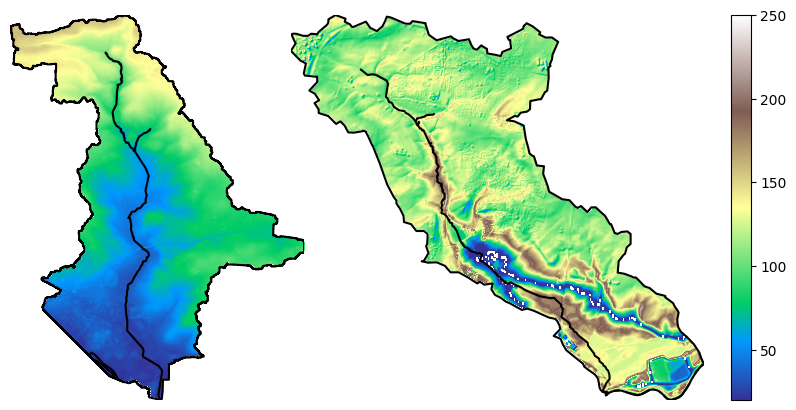

In [5]:
fig, axs = plt.subplots(ncols = 2, figsize=(12,5 ), gridspec_kw={'wspace': -0.3}, constrained_layout=False)

# Plot Wyke Beck
catchment_name  = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
plot_spatial_new(axs[0], model_directory + 'TerrainData/Terrain_clipped.tif', catchment_gdf, False) 

# Plot Lin Dyke    
catchment_name  = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
plot_spatial_new(axs[1], model_directory + 'TerrainData/Terrain_clipped.tif', catchment_gdf, True)  

fig.savefig("../PlotsForPaper/Figs/CatchmentProperties/Terrain_BothCatchments.jpg",  bbox_inches='tight')

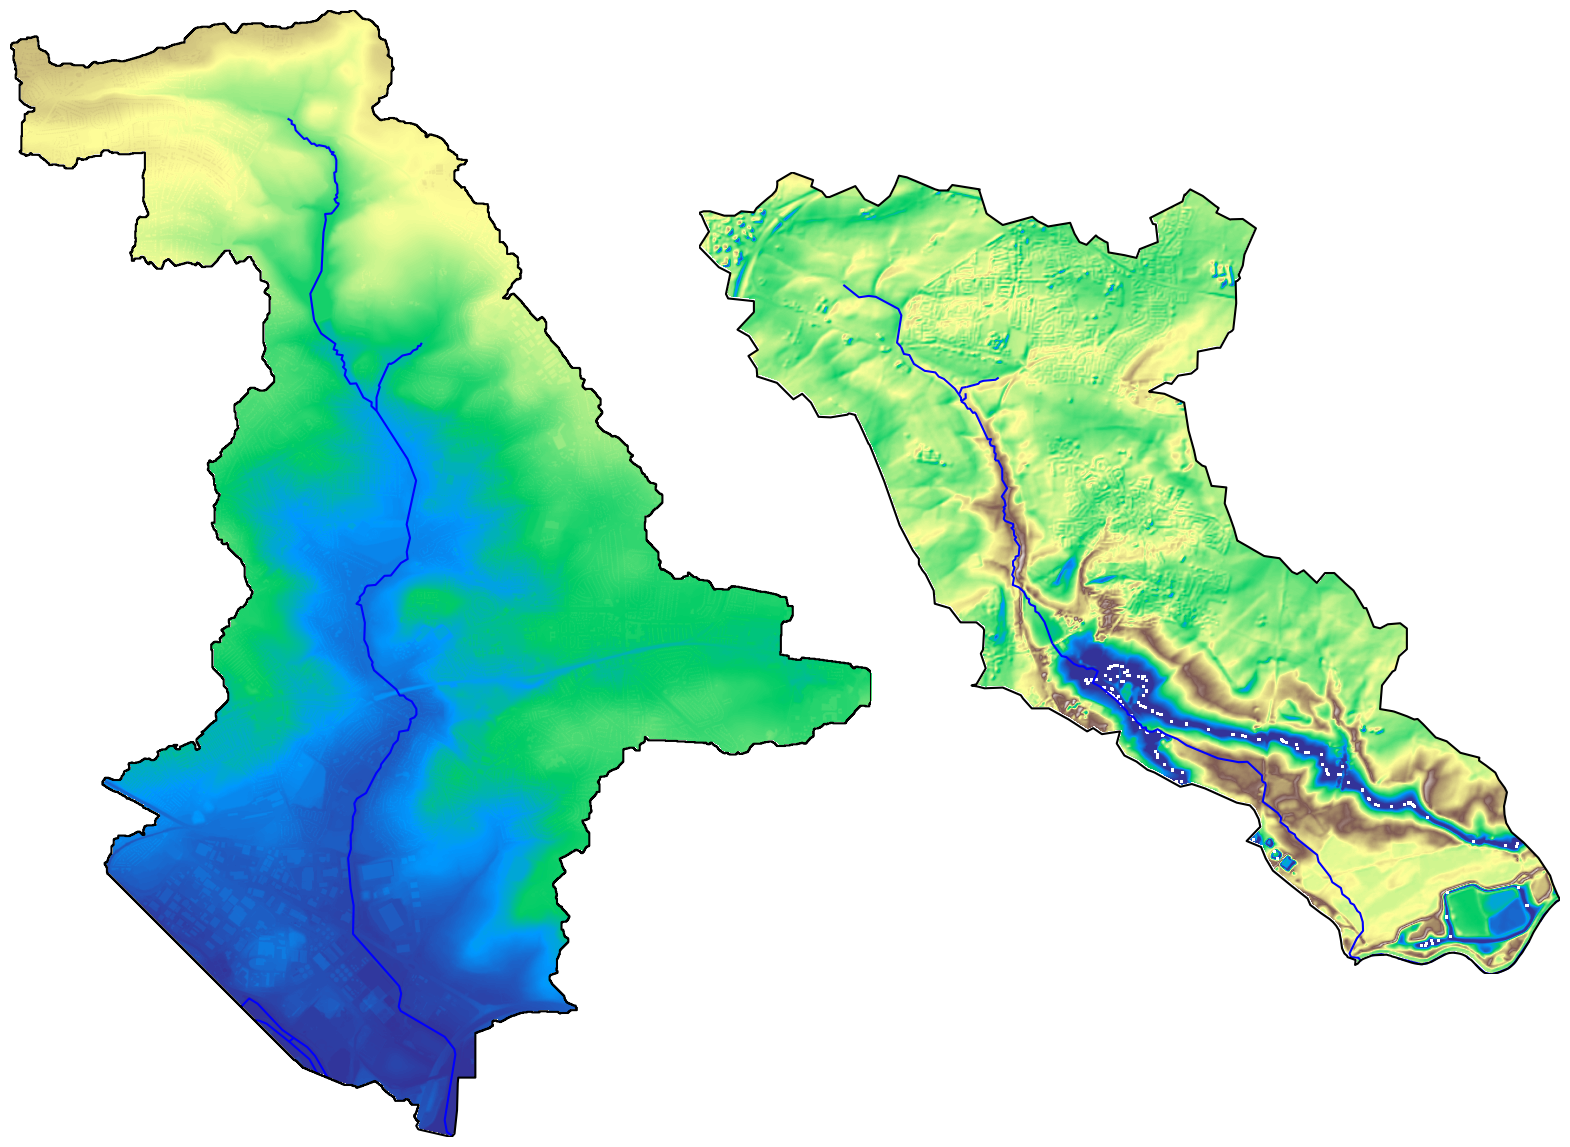

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 15), gridspec_kw={'wspace': -0.3})

ax =axs[0]
catchment_name  = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
fp = model_directory + 'TerrainData/Terrain_clipped.tif'
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)

with rasterio.open(fp) as src:
    image = plot.show(src, ax=ax,  cmap='terrain', vmin=20, vmax = 250)
    im = image.get_images()[0]
watercourses_clip.plot(ax=ax, color="blue")
catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

ax.axis('off');

ax =axs[1]
catchment_name  = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
fp = model_directory + 'TerrainData/Terrain_clipped.tif'


with rasterio.open(fp) as src:
    image = plot.show(src, ax=ax,  cmap='terrain', vmin=20, vmax = 250)
    im = image.get_images()[0]
    fig.colorbar(im, ax=ax, shrink = 2, location ='bottom')
watercourses_clip.plot(ax=ax, color="blue")
catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

ax.axis('off');

# fig.savefig("../PlotsForPaper/Figs/CatchmentProperties/LandCover_BothCatchments.jpg",  bbox_inches='tight')

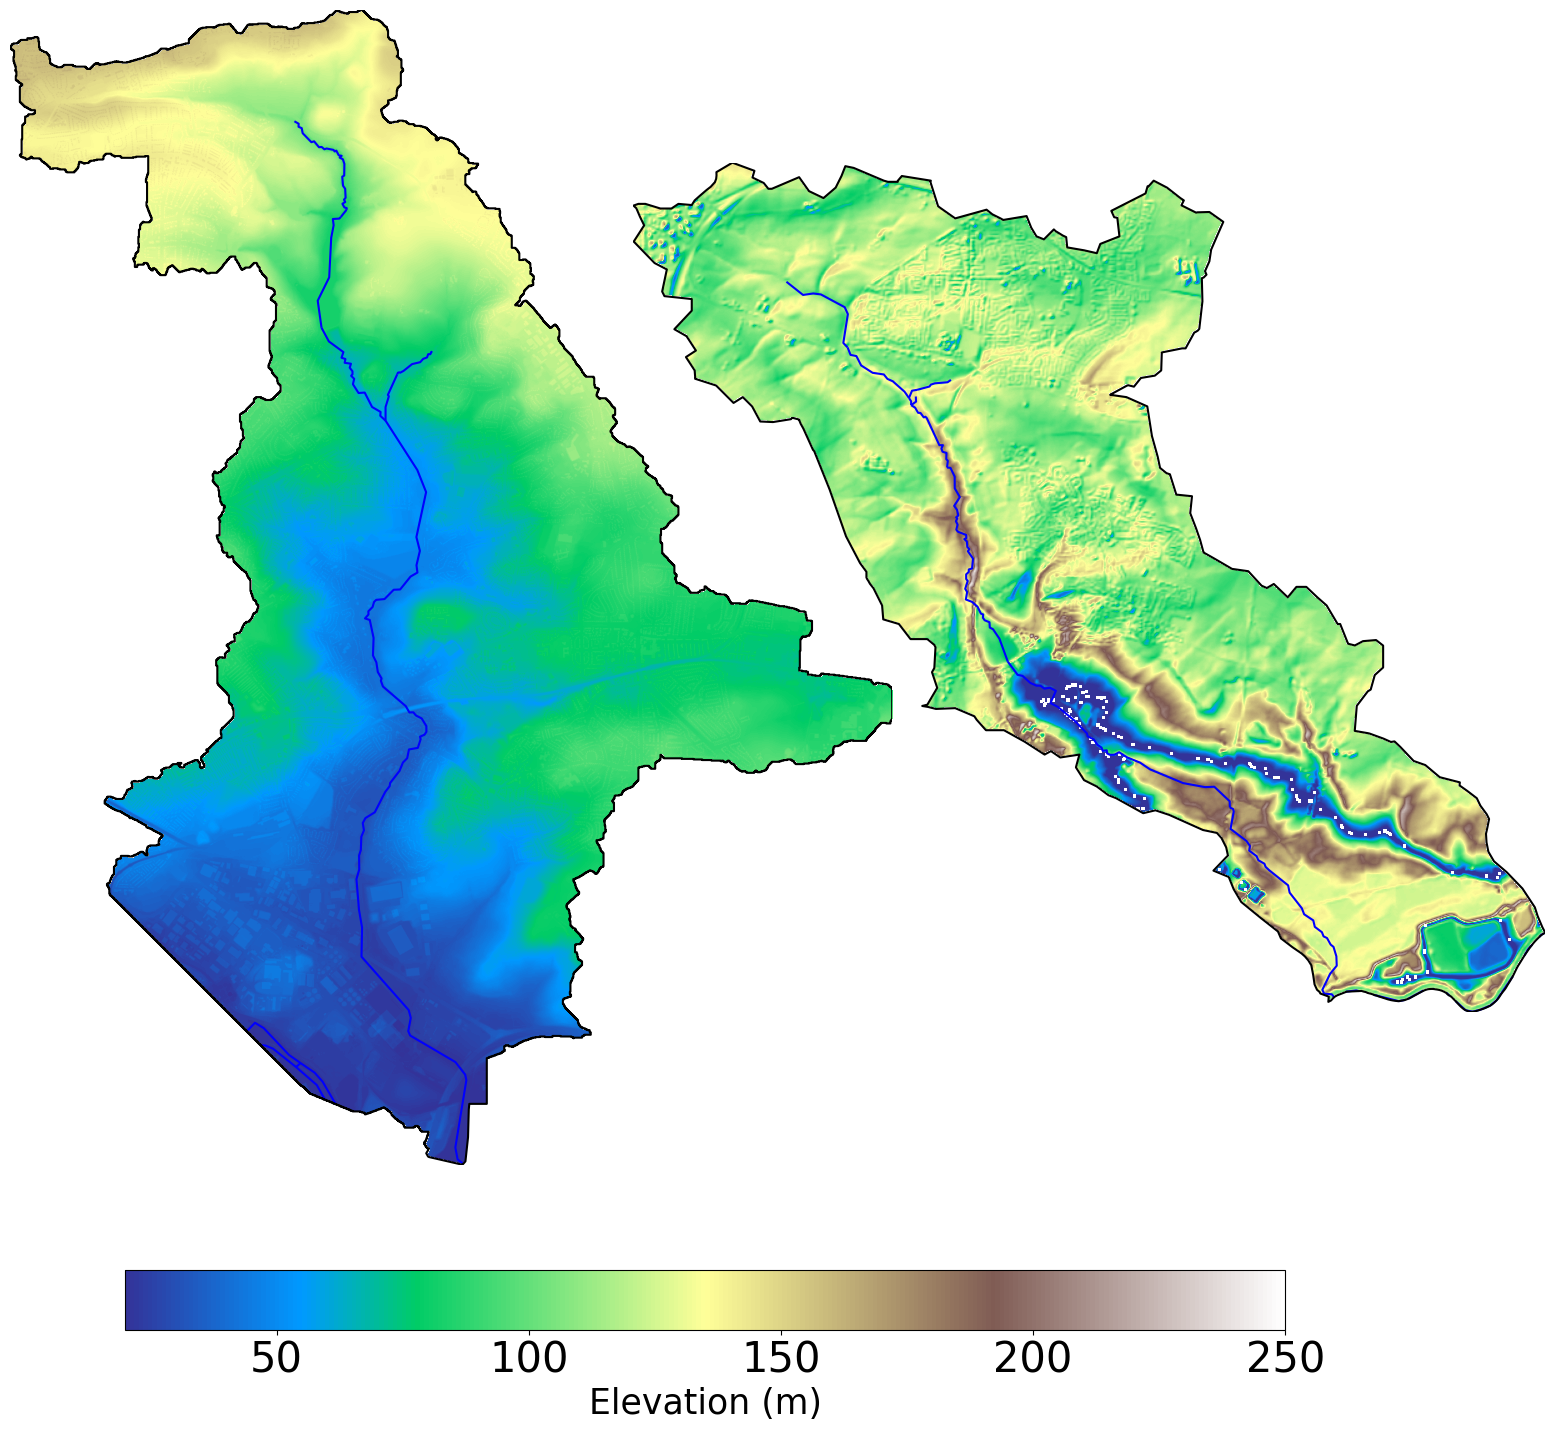

In [53]:
catchment_names = ['WykeBeck', 'LinDyke']
shpfile_names = ['WykeBeckCatchment', 'CatchmentLinDyke_exported']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,15), gridspec_kw={'wspace': -0.3})
for number, ax in enumerate(axes.flat):
    catchment_name = catchment_names[number]
    shpfile_name =   shpfile_names[number]
    model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
    fp = model_directory + 'TerrainData/Terrain_clipped.tif'
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/{}.shp'.format(shpfile_name, catchment_name))
    watercourses_clip = gpd.clip(watercourses, catchment_gdf)
    
    with rasterio.open(fp) as src:
        image = plot.show(src, ax=ax,  cmap='terrain', vmin=20, vmax = 250)
    ax.axis('off')
    
    watercourses_clip.plot(ax=ax, color="blue")
    catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

# fig.subplots_adjust(right=0.8)
# left, ?, right, ?
cbar_ax = fig.add_axes([0.19, 0, 0.58, 0.04])
cbar=  fig.colorbar(im, cax=cbar_ax, location = 'bottom', pad=10)
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('Elevation (m)', size =25)

fig.savefig("../PlotsForPaper/Figs/CatchmentProperties/Terrain_BothCatchments.jpg",  bbox_inches='tight')

## Plot landcover data for both catchments side by side

In [5]:
colors_dict = {'Deciduous woodland':'lightgreen',
               'Coniferous woodland':'darkgreen',
               'Arable':'khaki',
               'Improved grassland':'lightyellow',
               'Neutral grassland':'tan',
               'Calcareous grassland':'navajowhite',
               '7':'black',
               '8':'black',
               'Heather':'purple',
               'Heather grassland':'thistle',
                '11':'black',
                '12':'black',
                '13':'black',
               'Freshwater':'blue',
               '15':'black',
               '16':'black',
               '17':'black',
               '18':'black',
               '19':'black',
                'Semi urban': 'lightgrey', 
               'Urban':'dimgrey'}
colors = list(colors_dict.values())
labels = list(colors_dict.keys())

In [7]:
### Convert Wyke Beck labels to match Lin Dyke

In [8]:
# transdict = {1:20, 2:3, 3:1, 4:14, 5:4, 6:21, 7:5, 8:6, 9:10 }

# with rasterio.open(fp, 'r+') as src:
#     array = src.read()
#     newArray = copy(array)
#     for k, v in transdict.items(): newArray[array==k] = v
#     src.write(newArray)

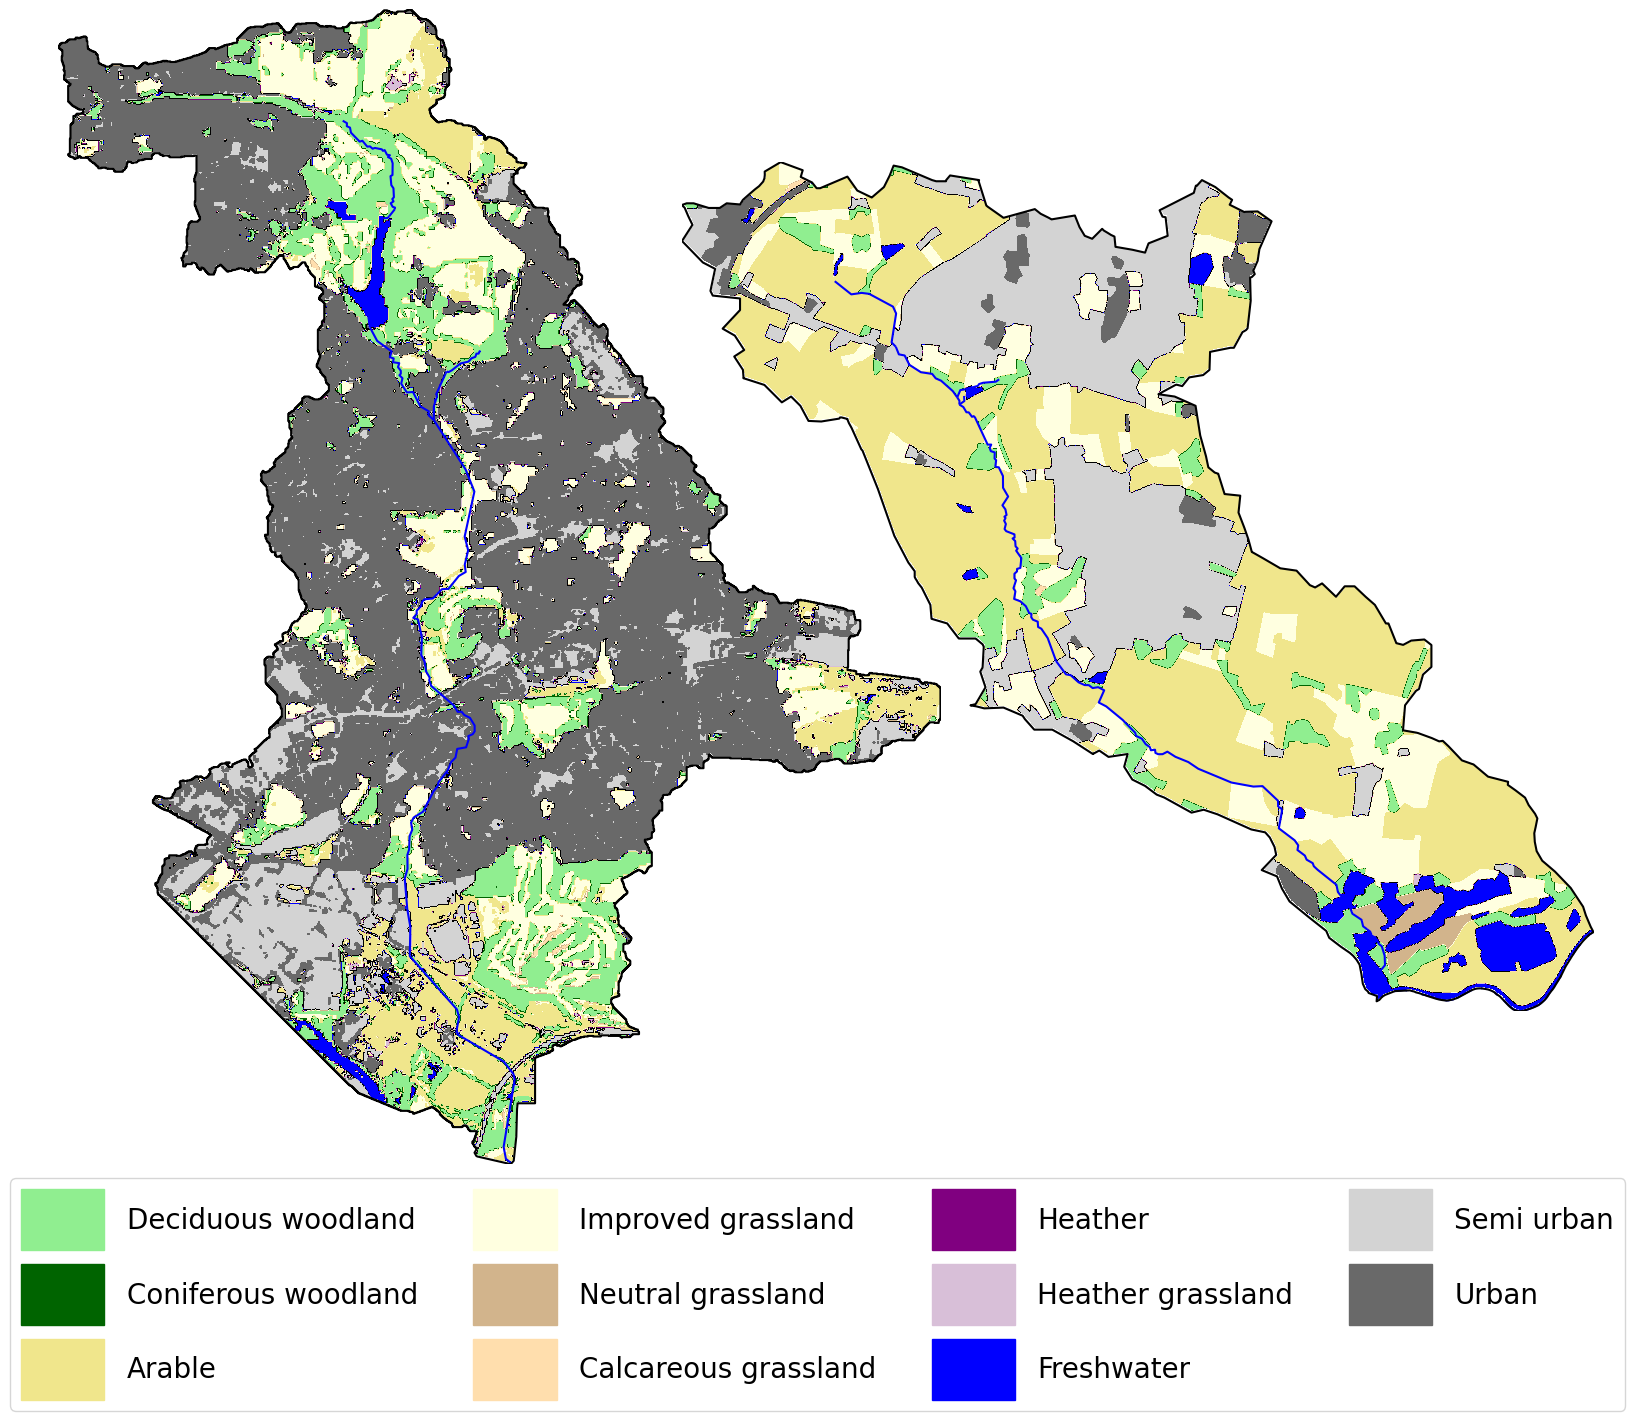

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 15), gridspec_kw={'wspace': -0.3})

ax =axs[0]
catchment_name = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
fp = model_directory+'LandCoverData/LandCover_clipped_MA_Download_resampled2m_clipped.tif'
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)

with rasterio.open(fp) as src:
    #array = src.read(1)
    image = plot.show(src, ax=ax,  cmap=cmap)

watercourses_clip.plot(ax=ax, color="blue")
catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

ax.axis('off');

ax =axs[1]
catchment_name = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
fp = model_directory+'LandCoverData/LandCover_clipped.tif'
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
legend =True

if legend == True:
    patches_list = []
    for i, color in  enumerate(colors):
        if color!='black':
            patch =  mpatches.Patch(color=color, label=labels[i])
            patches_list.append(patch)  
    ax.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =20,ncol = 4,
             bbox_to_anchor=(1.05,-0.18));
    
with rasterio.open(fp) as src:
    #array = src.read(1)
    image = plot.show(src, ax=ax,  cmap=cmap)

watercourses_clip.plot(ax=ax, color="blue")
catchment_gdf.boundary.plot(ax=ax, color="black", zorder=10)

ax.axis('off');

fig.savefig("../PlotsForPaper/Figs/CatchmentProperties/LandCover_BothCatchments.jpg",  bbox_inches='tight')

## Plot 3 landcover plots for one catchment (to check classes)

In [12]:
# catchment_name  = 'LinDyke'
# model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
# catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
# watercourses_clip = gpd.clip(watercourses, catchment_gdf)

# fig, axs = plt.subplots(ncols = 3, figsize=(24, 10))
# plot_spatial_new(axs[0], model_directory+ 'LandCoverData/LandCover_clipped.tif', catchment_gdf, False, colors_dict_ld['clipped'], labels_dict_ld['clipped'])    
# # plot_spatial_new(axs[1],  model_directory+'LandCoverData/LandCover_Urban_classification.tif', catchment_gdf,False,  colors_dict_ld['urban'], labels_dict_ld['urban'])
# plot_spatial_new(axs[1],  model_directory+'LandCoverData/LandCover_urban_and_suburban_classification.tif', catchment_gdf,False,  colors_dict_ld['urban'], labels_dict_ld['urban'])  
# plot_spatial_new(axs[2],  model_directory+'LandCoverData/LandCover_Freshwater_classification.tif',catchment_gdf,False,   colors_dict_ld['water'], labels_dict_ld['water'])    

NameError: name 'colors_dict_wb' is not defined

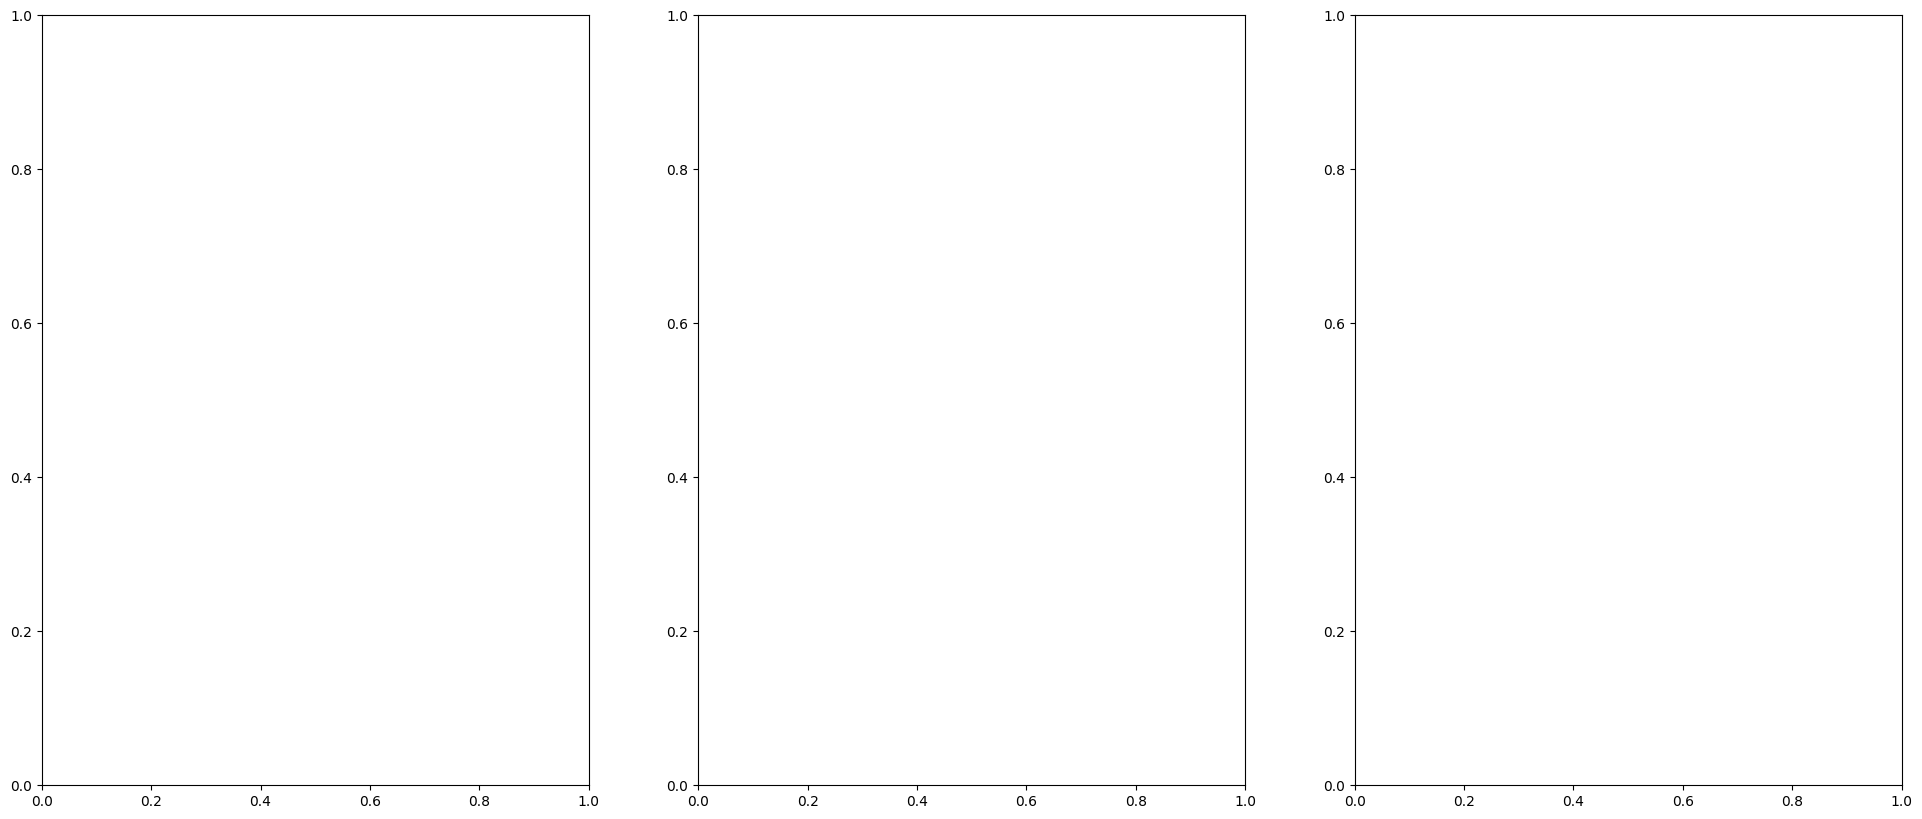

In [13]:
catchment_name  = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)

fig, axs = plt.subplots(ncols = 3, figsize=(24, 10))
plot_spatial_new(axs[0], model_directory+ 'LandCoverData/LandCover_clipped.tif', catchment_gdf,False, colors_dict_wb['clipped'], labels_dict_wb['clipped'])    
plot_spatial_new(axs[1],  model_directory+'LandCoverData/LandCover_Urban_classification.tif', catchment_gdf,False, colors_dict_wb['urban'], labels_dict_wb['urban'])  
plot_spatial_new(axs[2],  model_directory+'LandCoverData/LandCover_Freshwater_classification.tif',catchment_gdf,False,  colors_dict_wb['water'], labels_dict_wb['water'])        

### Find average elevation in each catchment
Old section looking at subcatchment areas.  
Look at GitHub if want to return to this code.

In [ ]:
# import pandas as pd
# import rioxarray as rxr

In [ ]:
# main_df=pd.DataFrame()
# raster = rxr.open_rasterio(model_directory + 'TerrainData/Terrain_clipped_QGIS.tif', masked=True).squeeze()
# for region_name in ['LinDyke', 'Kippax', 'Garforth', 'Kippax_West', 'Garforth_East', 'Garforth_West', 'South_Catchment', 
#                     'TB_South', 'TB_North']:
#     # Get region boundary
#     region_boundary = boundaries_gpd_dict[region_name]
        
#     # Trim terrain data
#     raster_clipped = raster.rio.clip(region_boundary.geometry.apply(mapping),region_boundary.crs)
    
#     # Add to 
#     df= pd.DataFrame({'mean1':np.nanmean(raster_clipped[1].data), "max1":np.nanmax(raster_clipped[1].data), 
#                       'min1':np.nanmin(raster_clipped[1].data)}, index=[region_name])
#     main_df=pd.concat([df, main_df],axis=0)

In [ ]:
# main_df.sort_values(by='mean1', ascending=False)

## Interactive landcover class plotting

In [ ]:
# import folium
# subcatchments=False
# import sys
# sys.path.append("../ProcessModelResults/")
# from my_functions import *

In [ ]:
# # Set up figure
# f = folium.Figure(width=1000, height=1000)

# # Create base map - location figures were from clat, clon, but wanted to create map before loop
# mapa = folium.Map(location=[53.768306874761016, -1.3756056884868098],zoom_start=12).add_to(f)
# folium.TileLayer(
#     tiles = 'https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}',
#     attr="No Base Map",
#     name="No Base Map",
#     show=True
# ).add_to(mapa)

# if subcatchments == True:
#     for subcatchment in ['LinDyke', 'Garforth_East', 'Garforth_West']:
#         # Catchment boundary
#         catchment_boundary_feature_group = FeatureGroup(name=subcatchment)
#         catchment_boundary_feature_group.add_child(folium.GeoJson(data=boundaries_gpd_dict[subcatchment]["geometry"],
#             style_function=lambda x,  fillColor='#00000000', color='Black': { "fillColor": '#00000000',"color": 'Black',}))
#         # Add to map
#         mapa.add_child(catchment_boundary_feature_group)

# # Add landcover data
# landcover_fps = [model_directory + 'LandCoverData/LandCover_clipped.tif',
#                  model_directory + 'LandCoverData/LandCover_water_classification.tif']
# names = ['Original', 'Classified']
# for number, landcover_fp in enumerate(landcover_fps):
#     xarray_dataarray = prep_for_folium_plotting(landcover_fp)
#     # Get coordinates needed in plotting
#     clat, clon = xarray_dataarray.y.values.mean(), xarray_dataarray.x.values.mean()
#     mlat, mlon = xarray_dataarray.y.values.min(), xarray_dataarray.x.values.min()
#     xlat, xlon = xarray_dataarray.y.values.max(), xarray_dataarray.x.values.max()
#     # Apply colormap
#     data  = ma.masked_invalid(xarray_dataarray.values)
#     colored_data = colorize(data.data, cmap='terrain')
    
#     # Add to map
#     feature_group1 = FeatureGroup(name=names[number])
#     feature_group1.add_child(folium.raster_layers.ImageOverlay(colored_data, [[mlat, mlon], [xlat, xlon]],
#                               opacity=0.8,interactive=True, popup=names[number]))
#     mapa.add_child(feature_group1)

# # Add layers to map
# mapa.add_child(LayerControl("topright", collapsed = False))
# display(mapa)